# House Prices

### Import Important Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

### Load Data

In [2]:
train_path = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
test_path = '/kaggle/input/house-prices-advanced-regression-techniques/test.csv'
df = pd.read_csv(train_path)
test_set = pd.read_csv(test_path)
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/tmp/ipykernel_1973/3549616927.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})


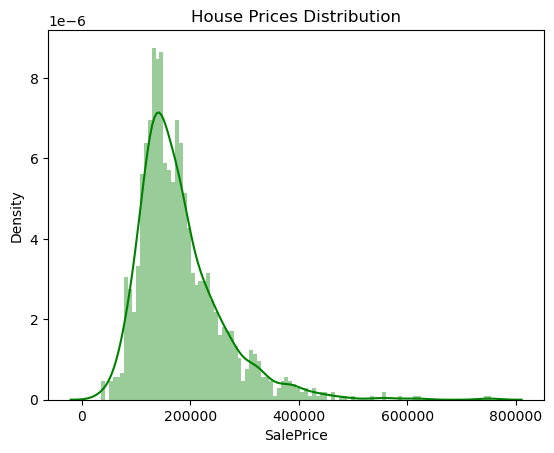

In [5]:
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.title('House Prices Distribution')
plt.show()

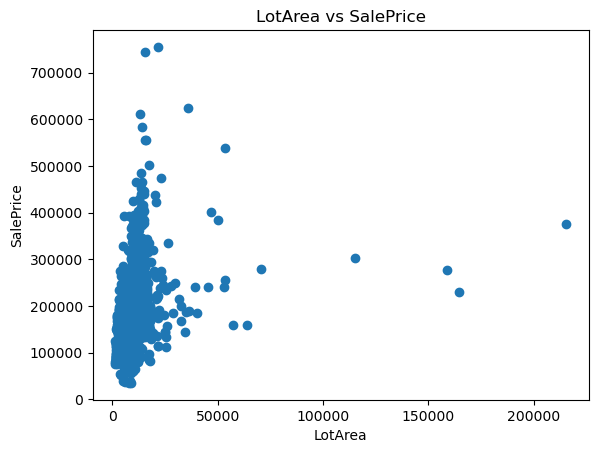

In [6]:
plt.scatter(df['LotArea'], df['SalePrice'])
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

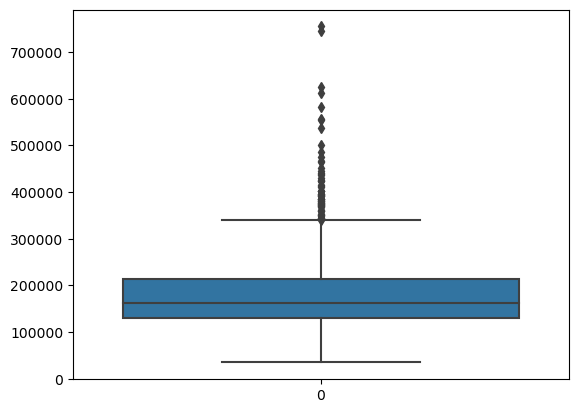

In [7]:
sns.boxplot(df['SalePrice'])
plt.show()

### Preprocess The Data

In [8]:
df.loc[df.SalePrice > 330000,'SalePrice'] = 330000


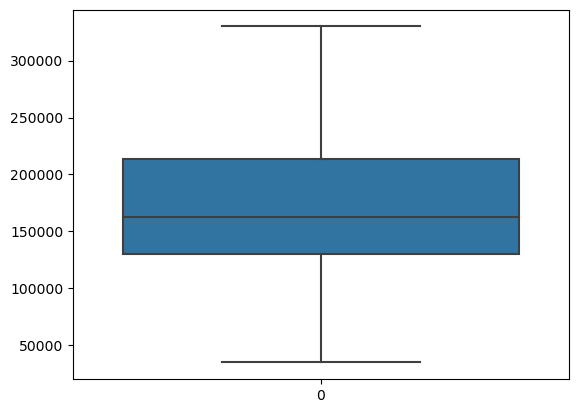

In [9]:
sns.boxplot(df['SalePrice'])
plt.show()

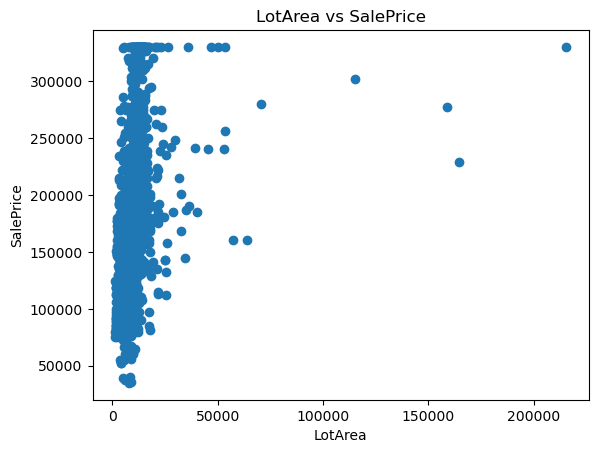

In [10]:
plt.scatter(df['LotArea'], df['SalePrice'])
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

In [11]:
droped_columns = ['Id', 'MSSubClass', 'LotFrontage', 'Alley', 'SaleType', 'SaleCondition', 'Neighborhood', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'Functional', 'PoolQC', 'Fence', 'MiscFeature']


In [12]:
df = df.drop(droped_columns, axis=1)
test_set = test_set.drop(droped_columns, axis=1)

In [13]:
#test_set['Utilities'].fillna(0, inplace=True)
#test_set['MSZoning'].fillna(0, inplace=True)

In [14]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1455 non-null   object 
 1   LotArea        1459 non-null   int64  
 2   Street         1459 non-null   object 
 3   LotShape       1459 non-null   object 
 4   LandContour    1459 non-null   object 
 5   Utilities      1457 non-null   object 
 6   LotConfig      1459 non-null   object 
 7   LandSlope      1459 non-null   object 
 8   Condition1     1459 non-null   object 
 9   Condition2     1459 non-null   object 
 10  HouseStyle     1459 non-null   object 
 11  OverallQual    1459 non-null   int64  
 12  OverallCond    1459 non-null   int64  
 13  YearBuilt      1459 non-null   int64  
 14  YearRemodAdd   1459 non-null   int64  
 15  MasVnrType     1443 non-null   object 
 16  MasVnrArea     1444 non-null   float64
 17  ExterQual      1459 non-null   object 
 18  ExterCon

In [15]:
encoder = {}
df_object = df.select_dtypes(['object']) 
for column in df_object.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    test_set[column] = le.fit_transform(test_set[column])
    encoder[column] = le

In [16]:
imputer = SimpleImputer()
df = imputer.fit_transform(df)
test_set = imputer.fit_transform(test_set)

In [17]:
x, y = df[:,:-1], df[:,-1]
(x.shape, y.shape)

((1460, 63), (1460,))

In [18]:
sc = StandardScaler()
x = sc.fit_transform(x)
test_set = sc.transform(test_set)

### Split The Data

In [19]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 0.8)
x_train.shape, y_train.shape

((1168, 63), (1168,))

### Linear regression Model

In [20]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [21]:
pred = lr.predict(x_val)

In [22]:
mean_absolute_error(pred, y_val)

17830.504019535365

In [23]:
y_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
y_test = y_test.iloc[:,1]

In [24]:
pred = lr.predict(test_set)

In [25]:
mean_absolute_error(pred, y_test)

49078.576202689364

### Random Forest

In [26]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)
pred = forest.predict(x_val)

In [27]:
mean_absolute_error(pred, y_val)

14947.577910958904

In [28]:
f_pred = forest.predict(test_set)
mean_absolute_error(f_pred, y_test)

48687.93980866355

### Neural Networks

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(63,)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8192      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 41,345
Trainable params: 41,345
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
37/37 [==============================] - 1s 3ms/step - loss: 36225187840.0000 - mae: 178381.8438
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 36009889792.0000 - mae: 177877.8750
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 34255400960.0000 - mae: 173829.3906
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 27507972096.0000 - mae: 156809.2656
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 14749028352.0000 - mae: 113284.6406
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 7327554048.0000 - mae: 71118.5547
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 5737827840.0000 - mae: 58496.7344
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 4692969472.0000 - mae: 52486.5977
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 3941048576.0000 - mae: 47310.3906
Epoch 10/100
37/37 [=======

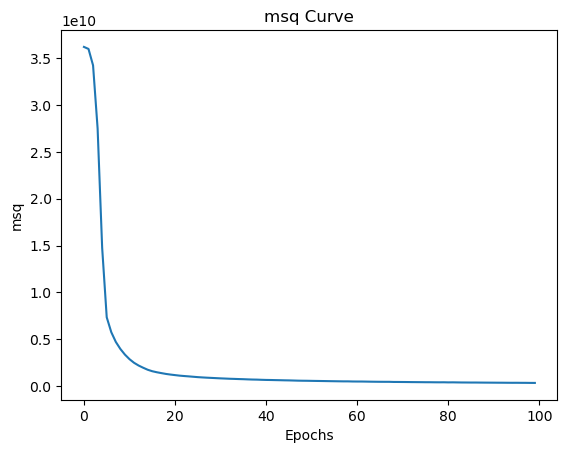

In [31]:
plt.plot(range(100), history.history['loss'])
plt.title('msq Curve')
plt.xlabel('Epochs')
plt.ylabel('msq')
plt.show()

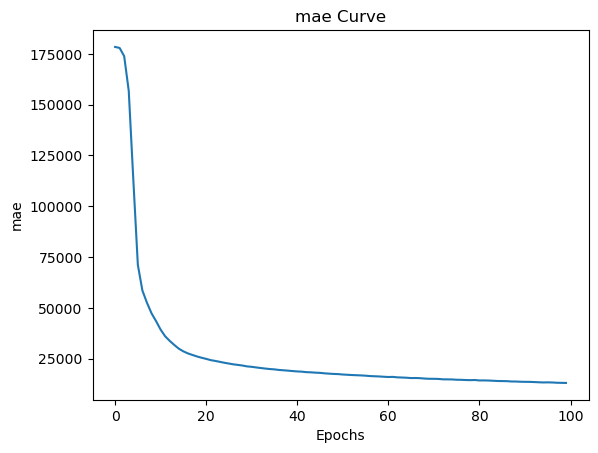

In [32]:
plt.plot(range(100), history.history['mae'])
plt.title('mae Curve')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.show()

In [33]:
model.evaluate(x_val, y_val)

10/10 [==============================] - 0s 2ms/step - loss: 627879744.0000 - mae: 18712.8516


[627879744.0, 18712.8515625]

In [34]:
model.evaluate(test_set, y_test)

46/46 [==============================] - 1s 2ms/step - loss: 3673535488.0000 - mae: 50535.5000


[3673535488.0, 50535.5]

#### The Best Model based on mean absolute error and test_set is Random Forest model

### Save Results

In [35]:
data = {'Id':list(range(1461,2920)), 'SalePrice':f_pred}
result = pd.DataFrame(data)
result.head()

,Id,SalePrice
0,1461,127866.58
1,1462,155629.40
2,1463,186787.75
3,1464,176258.50
4,1465,197507.30


In [36]:
result.to_csv('/kaggle/working/result.csv', index=False)

## thanks